In [1]:
import sys
sys.executable
# sys.path

'/Users/sd/miniconda3/bin/python'

In [2]:
import os
import numpy as np # linear algebra
!pip install pandas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
color = sns.color_palette()
!pip install pymysql
import pymysql
from scipy import stats

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
conn = pymysql.connect(
    host="insight.cxqzkfwl6f4a.us-east-1.rds.amazonaws.com",
    port=int(3306),
    user="shoukydanindenic",
    passwd="54nuq5mi",
    db="insight",
    charset='utf8mb4')

sql = """
SELECT 	
	Date_Format(a.Create_DateTime,'%Y-%m-%d') as "Date",
	a.Instance_UID as "Customer",
	count(*) as "Count"
FROM alert a
WHERE a.Create_DateTime >= DATE_SUB(CURDATE(), INTERVAL 119 DAY)
	AND a.Rule_Name is not NULL
	AND a.Instance_UID in ('293a66ba-6ee1-4451-81d4-50bb6e2137e1')
GROUP BY 1,2 
ORDER BY 2,1;
"""

df = pd.read_sql_query(sql, conn)


In [4]:
# df
# df.info()
# df.tail(5)
# df.sample(20)
# df.info()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
Date        91 non-null object
Customer    91 non-null object
Count       91 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [5]:
df.tail(20)

,Date,Customer,Count
71,2019-11-08,293a66ba-6ee1-4451-81d4-50bb6e2137e1,1
72,2019-11-09,293a66ba-6ee1-4451-81d4-50bb6e2137e1,1
73,2019-11-10,293a66ba-6ee1-4451-81d4-50bb6e2137e1,8
74,2019-11-14,293a66ba-6ee1-4451-81d4-50bb6e2137e1,3
75,2019-11-15,293a66ba-6ee1-4451-81d4-50bb6e2137e1,1
76,2019-11-16,293a66ba-6ee1-4451-81d4-50bb6e2137e1,3
77,2019-11-17,293a66ba-6ee1-4451-81d4-50bb6e2137e1,5
78,2019-11-18,293a66ba-6ee1-4451-81d4-50bb6e2137e1,3
79,2019-11-19,293a66ba-6ee1-4451-81d4-50bb6e2137e1,5
80,2019-11-20,293a66ba-6ee1-4451-81d4-50bb6e2137e1,3


# Test https://stackoverflow.com/questions/29091468/pandas-time-series-time-between-events

date_range = pd.date_range('2010-01-01', '2010-01-06')
df = pd.DataFrame([False, True, False, False, True, False], index=date_range, columns=['event'])
event_dates = df.index[df['event']]
df2 = pd.DataFrame(event_dates, index=event_dates, columns=['max_event_date'])
df = df.join(df2)
df['max_event_date'] = df['max_event_date'].cummax(axis=0, skipna=False)
df['days_since_event'] = df.index - df['max_event_date']

In [314]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
Date        87 non-null object
Customer    87 non-null object
Count       87 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


87

In [315]:
df['Date'].iloc[0]
df['Date'].iloc[len(df)-1]
data_range = (df['Date'].iloc[0],df['Date'].iloc[len(df)-1])

# Bulding one DF from all entries filling the missing data with 0

In [316]:
# first we will build a complete Series/DatFrame wth 120 Entries
reference_series=pd.Series(np.arange(2,122,1))
reference_df=pd.DataFrame(reference_series,columns=['Days'])
reference_df['dummy']=999
reference_df=reference_df.set_index("Days")
# reference_df


In [317]:
customer_list=df['Customer'].unique().tolist()
customer_list

['293a66ba-6ee1-4451-81d4-50bb6e2137e1']

In [318]:
number_of_costomers=len(customer_list)
number_of_costomers

1

# New Section 

---

let's check what we can do 

In [319]:
# aa=df[df['Customer']=='ff29622b-fe7e-41cd-8c3f-eed1204ba416']
# aa=aa.set_index('Days')
# aa.rename(columns={'Customer': 'todel', 'Count': 'customer'}, inplace=True)
# aa.drop(['todel'],axis=1,inplace=True)
# reference_df=reference_df.join(aa, how='outer')

for cust in customer_list:
  a=df[df['Customer']==cust]
  a=a.set_index('Date')
  a.rename(columns={'Customer': 'todel', 'Count': cust}, inplace=True)
  a.drop(['todel'],axis=1,inplace=True)
  reference_df=reference_df.join(a, how='outer')
  


In [320]:
reference_df.fillna(0,inplace=True)
referance_df=reference_df.drop(['dummy'],axis=1,inplace=True)

In [321]:
reference_df=reference_df.astype('int64')
reference_df

,293a66ba-6ee1-4451-81d4-50bb6e2137e1
2,0
3,0
4,0
5,0
6,0
...,...
2019-10-10,1
2019-10-11,4
2019-10-12,7
2019-10-13,4


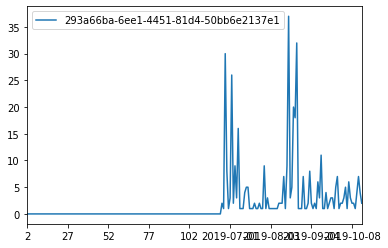

In [322]:

reference_df.plot()

In [323]:
df_sdoriginal=reference_df.copy()
df_sd=reference_df.copy()
df_sdoriginal

,293a66ba-6ee1-4451-81d4-50bb6e2137e1
2,0
3,0
4,0
5,0
6,0
...,...
2019-10-10,1
2019-10-11,4
2019-10-12,7
2019-10-13,4


# here we check running "0"

In [324]:
col_list=df_sdoriginal.columns

print("col_list {}".format(col_list))

df_sd.head()

for c in col_list:
    a=df_sd[c]
    b=[0]*len(a)
    for i in range(len(a)):
        if a.iloc[i] == 0:
            b[i] = b[i-1] + 1
        else:
            b[i] = 0
    #print ('this is the list of consecative 0 in the {} Column {}'.format(c,b) )
    #b=pd.Series(b) 
    df_sd[c+"-0s"]= pd.Series(b, index=df_sd.index)
    df_sd
df_sd.head()
col_list

col_list Index(['293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')


Index(['293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')

# Now we check the AVG and STD for 4 consequetive numbers

In [325]:
for c in col_list:
    df_sd[c+'-avg_4'] = (df_sdoriginal[c].rolling(4).mean())
    df_sd[c+'-std_4'] = (df_sdoriginal[c].rolling(4).std())

In [326]:
df_sd.head()

,293a66ba-6ee1-4451-81d4-50bb6e2137e1,293a66ba-6ee1-4451-81d4-50bb6e2137e1-0s,293a66ba-6ee1-4451-81d4-50bb6e2137e1-avg_4,293a66ba-6ee1-4451-81d4-50bb6e2137e1-std_4
2,0,1,NaN,NaN
3,0,2,NaN,NaN
4,0,3,NaN,NaN
5,0,4,0.0,0.0
6,0,5,0.0,0.0


In [327]:
 col_list

Index(['293a66ba-6ee1-4451-81d4-50bb6e2137e1'], dtype='object')

Max 0s {} 120


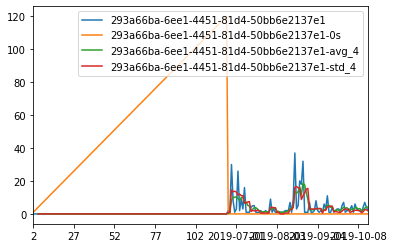

In [328]:
print("Max 0s {}",df_sd[c+"-0s"].max())

df_sd.plot()

In [329]:
# df_sd.info()
for c in col_list:
    df_sd[c+'res'] = (df_sd[c+"-0s"]>2) | (df_sd[c]<(df_sd[c+'-avg_4']-df_sd[c+'-std_4']))


In [330]:
for c in col_list:
    print ("for the ", c , "check the following",df_sd[c+'res'][df_sd[c+'res']==True])

for the  293a66ba-6ee1-4451-81d4-50bb6e2137e1 check the following 4             True
5             True
6             True
7             True
8             True
              ... 
2019-08-21    True
2019-09-23    True
2019-10-02    True
2019-10-10    True
2019-10-14    True
Name: 293a66ba-6ee1-4451-81d4-50bb6e2137e1res, Length: 124, dtype: bool


In [331]:
for c in col_list:
    print(df_sd[c+'res'][df_sd[c+'res']==True])

4             True
5             True
6             True
7             True
8             True
              ... 
2019-08-21    True
2019-09-23    True
2019-10-02    True
2019-10-10    True
2019-10-14    True
Name: 293a66ba-6ee1-4451-81d4-50bb6e2137e1res, Length: 124, dtype: bool


In [332]:
col_list=df_sd.columns
col_res=[c for c in col_list]

col_res[-number_of_costomers:]

['293a66ba-6ee1-4451-81d4-50bb6e2137e1res']

In [333]:
%matplotlib inline
final=df_sd[col_res[-number_of_costomers:]]


In [334]:
# sns.set()

# fig, axes = plt.subplots(nrows=number_of_costomers,figsize=(30, 200))

# for j,i in enumerate(final.columns):
#   (final[i]*1).plot.bar(ax=axes[j],color='b',title= i,yticks=(0,1) );
#   axes[j].title.set_size(20);
  



# The drawing takes some time so be patient  👌🎈 

In [335]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:118], linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 

    

In [ ]:
#final.loc[2:100]
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:120].T, linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 